In [4]:
!wget "https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py"
!wget "https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkplot.py"

--2020-04-17 05:08:39--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47512 (46K) [text/plain]
Saving to: ‘thinkdsp.py.1’

thinkdsp.py.1       100%[===================>]  46.40K  --.-KB/s    in 0.02s   

2020-04-17 05:08:39 (1.84 MB/s) - ‘thinkdsp.py.1’ saved [47512/47512]

--2020-04-17 05:08:41--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkplot.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22756 (22K) [text/plain]
Saving to: 

In [0]:
# [Sol]

from thinkdsp import Sinusoid
import numpy as np

#
# copy these 2 for references...
#
# class JwTriSignal(Sinusoid):
# class JwSqrSignal(Sinusoid):
#

#'''
class JwTriSignal(Sinusoid):
    """Jw Represents a triangle signal."""
        
    def evaluate(self, ts):
    
        θ= ts * 2 * np.pi * self.freq + self.offset # 在此作橫軸之變數變換

        θ= θ % (np.pi * 2) # 這一行讓 θ 周而復始，週期維持在 (2 π)

        x0= θ *(-2/np.pi) +1
        x1= θ *(+2/np.pi) -3

        x= x0 * (θ<np.pi) + x1 * (θ>=np.pi) # 這一行稍微有深度！！

        x= x * self.amp # 最後輸出前，再把縱軸拉到 振幅 = amp

        return x

class JwSqrSignal(Sinusoid):
    """Jw Represents a square signal."""
        
    def evaluate(self, ts):
    
        θ= ts * 2 * np.pi * self.freq + self.offset # 在此作橫軸之變數變換

        θ= θ % (np.pi * 2) # 這一行讓 θ 周而復始，週期維持在 (2 π)

        x0= -1 #上半周 #θ *(-2/np.pi) +1
        x1= +1 #下半周 #θ *(+2/np.pi) -3

        x= x0 * (θ<np.pi) + x1 * (θ>=np.pi) # 這一行稍微有深度！！

        x= x * self.amp # 最後輸出前，再把縱軸拉到 振幅 = amp

        return x       
#'''


class JwSawtoothSignal(Sinusoid):
    """Jw Represents a sawtooth signal."""
        
    def evaluate(self, ts):
    
        θ= ts * 2 * np.pi * self.freq + self.offset # 在此作橫軸之變數變換

        θ= θ % (np.pi * 2) # 這一行讓 θ 周而復始，週期維持在 (2 π)

        x= -1 + θ/np.pi # 從 -1 開始爬坡，上半週期到達　0,下半周期到達 +1 
       
        x= x * self.amp # 最後輸出前，再把縱軸拉到 振幅 = amp

        return x

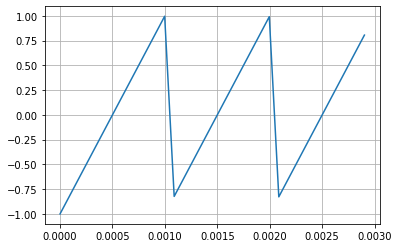

In [8]:
# Let's test what we have created
import matplotlib.pylab as pl

x= JwSawtoothSignal(freq=1000)
x.plot()
pl.grid()

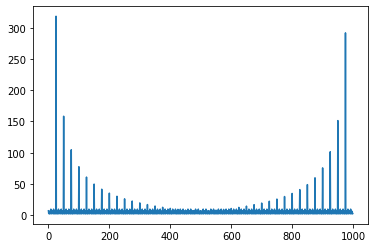

In [12]:

# make its spectrum
w= x.make_wave()
s= w.make_spectrum()
s.plot(high=1000)

# you will see the spectrum has both odd and even multiples of 100 Hz